# Exploratory Data Analysis - Stroke Dataset
### In the scope of Introduction to Machine Learning & Artificial Inteligence Class, 02/2022

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### References
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## Data Importing and Description

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [471]:
file_path = 'C:/Users/ManuelSousa/Documents/Pós-Graduação Applied AI & ML/Bloco 1/Introduction AI & ML/trabalho/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path, header = 0)

# display all columns
pd.options.display.max_columns = None

In [472]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [473]:
# Tamanho do dataset
print('Nº linhas:', df.shape[0])
print('Nº colunas:', df.shape[1])

Nº linhas: 5110
Nº colunas: 12


In [474]:
# Colunas no dataset
columns = df.columns.tolist()
print("Colunas:", columns)

Colunas: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [475]:
# Encontra valores nulos no dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning

In [477]:
# Identifica as linha com valores nulos(NaN)
nan_bmi = df[df['bmi'].isna()]
print(nan_bmi)
# Calcula o peso das linhas com valores nulos no total do conjunto de dados
print('\nPeso(%) dos valores NaN:', (nan_bmi.shape[0]*100)/df.shape[0])

         id  gender   age  hypertension  heart_disease ever_married  \
1     51676  Female  61.0             0              0          Yes   
8     27419  Female  59.0             0              0          Yes   
13     8213    Male  78.0             0              1          Yes   
19    25226    Male  57.0             0              1           No   
27    61843    Male  58.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5039  42007    Male  41.0             0              0           No   
5048  28788    Male  40.0             0              0          Yes   
5093  32235  Female  45.0             1              0          Yes   
5099   7293    Male  40.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
1     Self-employed          Rural             202.21  NaN     never

In [478]:
# Lista especificamente o campos categoricos
categorical_col = df.select_dtypes(exclude=np.number).columns
print(categorical_col)

# Mostrar todos os valores presentes em coluna
def column_values(column_name):
    print('\n - ', column_name)
    # unique values in column
    print(df[column_name].unique())
    # check the return type
    print(type(df[column_name].unique()))
    # value counts of each unique value
    print(df[column_name].value_counts())

# Só vão ser analisados os campos categóricos
for col in categorical_col:    
    column_values(col)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

 -  gender
['Male' 'Female' 'Other']
<class 'numpy.ndarray'>
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 -  ever_married
['Yes' 'No']
<class 'numpy.ndarray'>
Yes    3353
No     1757
Name: ever_married, dtype: int64

 -  work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
<class 'numpy.ndarray'>
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

 -  Residence_type
['Urban' 'Rural']
<class 'numpy.ndarray'>
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

 -  smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
<class 'numpy.ndarray'>
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Algumas observações sobre o dataset: 
- Existem linhas com campos nulos, nomeadamente na feature "bmi". Como essas linhas com valores nulos têm apenas um peso de 3% no dataset e aplicar uma média/mediana para transformar esses campos não é a melhor abordagem devido à incerteza dos valores, estas linhas vão ser eliminadas;
- A feature "gender", supostamente um campo binário, apresenta um valor desconhecido (Other). Vai ser analisado o peso que este campo tem no dataset e se possivel vai ser eliminado;
- A feature "smoking_status" apresenta valores "unknown", tal como indicado na descrição do problema. Vai ser análisado pois caso este campo tenha pouco peso vai ser estudada a possibilidade de o eliminar. 

In [479]:
# Foi detectado um valor desconhecido na feature "gender". Vai proceder-se à sua limpeza.
# Verificar as linhas em que o genero aparece como "Other"
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [480]:
# Eliminar todas a linha com genero desconhecido
# drop rows that contain specific 'value' in 'column_name'
data = df[df.gender != 'Other']

In [481]:
unk_smoking_status = df[df['smoking_status'] == 'Unknown']
print('\nPeso(%) dos valores Unknown:', (unk_smoking_status.shape[0]*100)/df.shape[0])


Peso(%) dos valores Unknown: 30.21526418786693


Nota: Os campos Unknown vão manter-se pois têm bastante peso no dataset.

In [482]:
# Vai eliminar-se a coluna ID, pois não tem utilidade
# drop one column by name
df.drop('id', axis=1, inplace=True)

In [483]:
df1 = df.dropna()
print(df1.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#### Detetar outliers em features numéricas

In [484]:
# Identificar e avaliar a presença de outliers nas features numéricas - age, avg_glucose_level e bmi

def box_plotting(column_name):
    print("\n - ", column_name)
    # Gera gráfico caixa de bigodes
    sns.boxplot(df1[column_name])

    # Calcular os quartis e o indice quartil
    q1 = df1[column_name].quantile(0.25)
    q3 = df1[column_name].quantile(0.75)
    IQR = q3 - q1
    median = df1[column_name].median()
    print("Quartil 1: ", q1)
    print("Mediana: ", median)
    print("Quartil 3: ", q3)
    print("Interquantil Range (IQR): ", IQR)

    # Cacular os limites min/max para calcular outliers
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    print("Limite Superior:", upper)
    print("Limite Inferior:", lower)
    
    return {'q1': q1, 'q3': q3, 'median': median, 'iqr': IQR, 'lower': lower, 'upper': upper}



 -  age
Quartil 1:  25.0
Mediana:  44.0
Quartil 3:  60.0
Interquantil Range (IQR):  35.0
Limite Superior: 112.5
Limite Inferior: -27.5


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


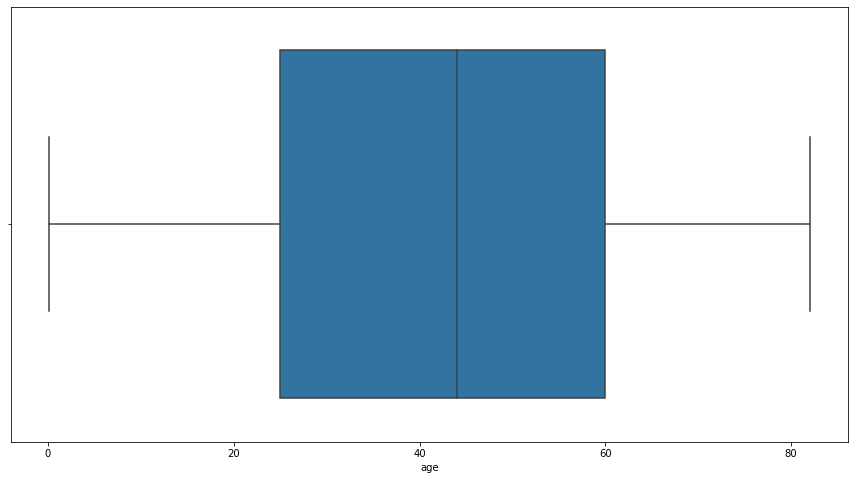

In [485]:
outliers_age = box_plotting('age')


 -  avg_glucose_level
Quartil 1:  77.07
Mediana:  91.68
Quartil 3:  113.57
Interquantil Range (IQR):  36.5
Limite Superior: 168.32
Limite Inferior: 22.319999999999993


C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


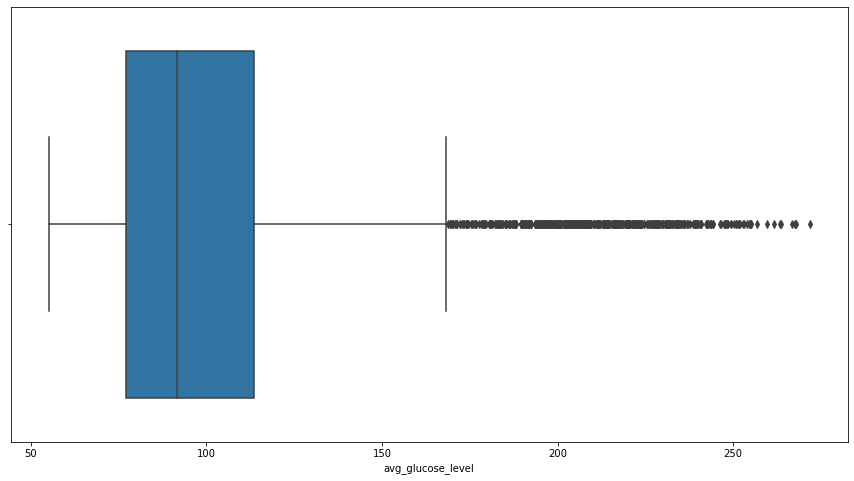

In [486]:
outliers_avg_glucose_level = box_plotting('avg_glucose_level')

C:\Users\ManuelSousa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



 -  bmi
Quartil 1:  23.5
Mediana:  28.1
Quartil 3:  33.1
Interquantil Range (IQR):  9.600000000000001
Limite Superior: 47.5
Limite Inferior: 9.099999999999998


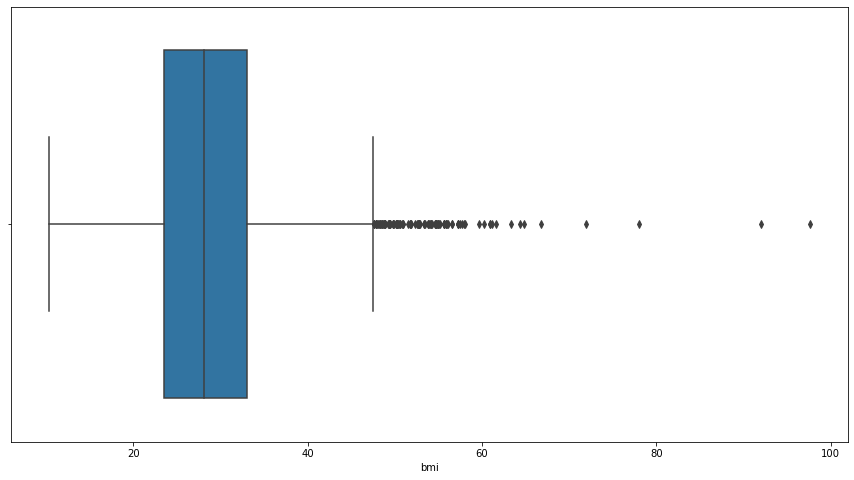

In [487]:
outliers_bmi = box_plotting('bmi')

#### Testar o impacto no dataset ao removermos os outliers:

In [488]:
clean_data1 = df1[~((df1["bmi"] < outliers_bmi['lower']) |(df1["bmi"] > outliers_bmi['upper']))]
print(clean_data1.shape[0])
print(df1.shape[0])

4799
4909


In [489]:
clean_data2 = df1[~((df1["avg_glucose_level"] < outliers_avg_glucose_level['lower']) |(df1["avg_glucose_level"] > outliers_avg_glucose_level['upper']))]
print(clean_data2.shape[0])
print(df1.shape[0])

4342
4909


#### Nota: Sendo que nem sempre os outliers são necessáriamente "maus dados", fica a dúvida qual será o custo/beneficio ao eliminar estes valores correndo o risco de ficar com um dataset mais pequeno.

In [490]:
df1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [491]:
# Tamanho do dataset limpo
print('Nº linhas:', df1.shape[0])
print('Nº colunas:', df1.shape[1])

Nº linhas: 4909
Nº colunas: 11


In [492]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [493]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Transformation

#### 1 - Converter as variávies numéricas (e binárias) em numéricas: gender, ever_married e Residence_type

In [494]:
label_encoder = LabelEncoder()
df2 = df1 # Criar outra dataframe, deixando 
df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2['ever_married'] = label_encoder.fit_transform(df2['ever_married'])
df2['Residence_type'] = label_encoder.fit_transform(df2['Residence_type'])

C:\Users\MANUEL~1\AppData\Local\Temp/ipykernel_16232/461868213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = label_encoder.fit_transform(df2['gender'])
C:\Users\MANUEL~1\AppData\Local\Temp/ipykernel_16232/461868213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ever_married'] = label_encoder.fit_transform(df2['ever_married'])
C:\Users\MANUEL~1\AppData\Local\Temp/ipykernel_16232/461868213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [495]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


#### 2 - Utilziar One_Hot_Encoder para as variáveis categóricas em binárias: work_type, smoking_status

In [496]:
df2 = pd.get_dummies(df1, prefix=['work_type', 'smoking_status'], prefix_sep="_")

In [497]:
df2

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


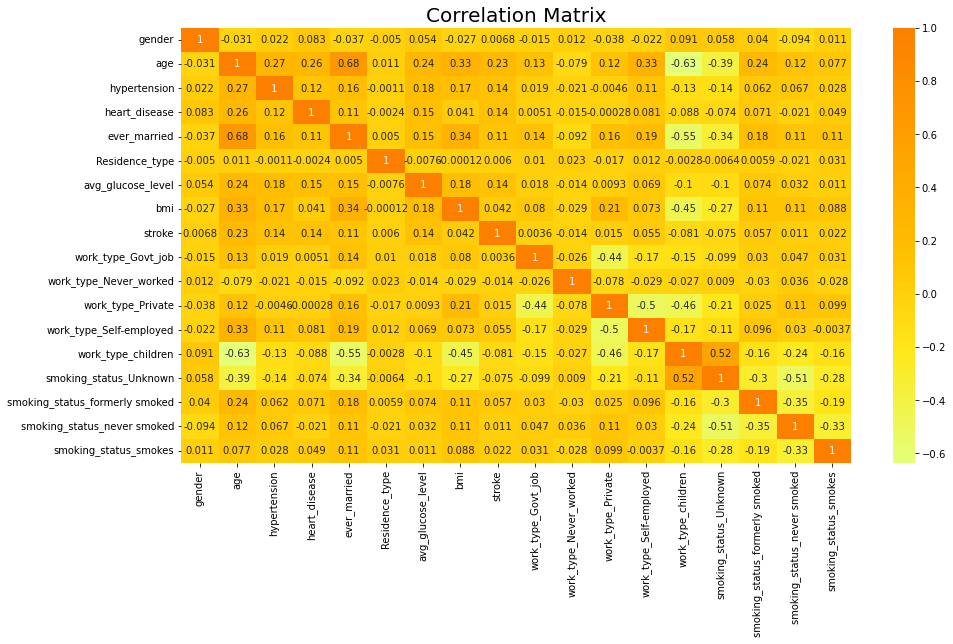

In [502]:
# Correlação entre features
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df2.corr(), cmap = 'Wistia', annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

In [499]:
# análise de correlação
# começar a fazer gráficos